In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#pd.options.mode.chained_assignment = None  # default='warn'

In [62]:
# read kaggle train.csv data into dataframe called titanic
# https://www.kaggle.com/c/titanic/data
df = pd.read_csv('data/kaggleTitanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.shape

(891, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# set up data for analysis
X = df.drop(['Survived'], axis=1)
y = df['Survived']
# from sklearn.model_selection import train_test_split
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
# Xtrain.shape

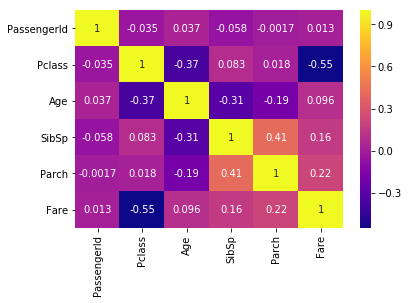

In [67]:
#X.corr()
sns.heatmap(X.corr(), annot=True, cmap='plasma')

In [68]:
##### what data can we drop right away?

In [69]:
# Transformation 1
# PassengerId and Ticket don't seem to have any useful info, so let's drop them
X.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [70]:
# Transformation 2
# The Name column on it's own isn't useful, but the Titles might be;
# Create a Title column, and drop the Name column
#-------
#mystr = "Robins, Mrs. Alexander A (Grace Charity Laury)"
#re.findall(r'[a-zA-Z]+[.]', mystr) # one or more alphabets followed by a period
#re.findall(r'[a-zA-Z]+[.]', mystr)[0]
#X['Title'] = X['Name'].apply(lambda x : re.findall(r'[a-zA-Z]+[.]', x)[0] if pd.notna(x) else np.nan)
#X['Title'].value_counts()
#X['Title'] = X['Title'].apply(lambda x: x if x in ["Mr.", "Miss.", "Mrs.", "Master."] else "Other")
##X['Title'].value_counts()
#-------
import re
def getTitle(name):
    if pd.notna(name):
        title = re.findall(r'[a-zA-Z]+[.]', name)[0]
        if title in ["Mr.", "Miss.", "Mrs.", "Master."]:
            return title
        else:
            return "Other"
    else:
        return np.nan
X['Title'] = X['Name'].apply(getTitle)
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.


In [71]:
# Transformation 3
# The Cabin column on it's own isn't useful, but the Deck (First Letter in Cabin) might be;
# Create a Deck column, and drop the Cabin column
#---------
#X['Deck'] = X['Cabin'].apply(lambda x : x[0] if pd.notna(x) else np.nan)
#X.head()
#---------
def getDeck(cabin):
    if pd.notna(cabin):
        return cabin[0]
    else:
        return np.nan
X['Deck'] = X['Cabin'].apply(getDeck)
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,NaN
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,NaN
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,C
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,NaN


In [72]:
##### let's deal with missing data now

In [73]:
# what percentage of data is missing in each column?
X.isna().sum()/X.shape[0]

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Title       0.000000
Deck        0.771044
dtype: float64

In [74]:
# Transformation 4
# let's  fill the missing Deck values with "X"
from sklearn.impute import SimpleImputer
sideck = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='X') 
X['impDeck'] = pd.DataFrame(sideck.fit_transform(X[['Deck']]))
X.isna().sum()/X.shape[0]

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Title       0.000000
Deck        0.771044
impDeck     0.000000
dtype: float64

In [75]:
# Pclass has no missing data, but Deck seems to have a lot of missing data
# is missing Deck data somehow related to Pclass?
# X.groupby(['Pclass', 'impDeck']).count()['Fare'] 
# X.groupby(['Pclass']).count()['Fare']
X.groupby(['Pclass', 'impDeck']).count()['Fare'] / X.groupby(['Pclass']).count()['Fare']
# yes, it seems like the lower classes are missing more data for impDeck
# since the impDeck missing data seems highly correlated to Pclass, we are unlikely to get any 
# additional information from keeping the columns, so we can keep it or drop it.
# let's keep it for now.

Pclass  impDeck
1       A          0.069444
        B          0.217593
        C          0.273148
        D          0.134259
        E          0.115741
        T          0.004630
        X          0.185185
2       D          0.021739
        E          0.021739
        F          0.043478
        X          0.913043
3       E          0.006110
        F          0.010183
        G          0.008147
        X          0.975560
Name: Fare, dtype: float64

In [76]:
# Transformation 5
# only a small fraction of the Embarked values are missing, so let's fill the missing values with "X"
from sklearn.impute import SimpleImputer
siembarked = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='X') 
X['impEmbarked'] = pd.DataFrame(siembarked.fit_transform(X[['Embarked']]))
X.isna().sum()/X.shape[0]

Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Title          0.000000
Deck           0.771044
impDeck        0.000000
impEmbarked    0.000000
dtype: float64

In [77]:
# Transformation 6
# around 20% of age data is missing. let's replace that with the median age
from sklearn.impute import SimpleImputer
siage = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1) 
#siage = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None) 
X['impAge'] = pd.DataFrame(siage.fit_transform(X[['Age']]))
X.isna().sum()/X.shape[0]

Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Title          0.000000
Deck           0.771044
impDeck        0.000000
impEmbarked    0.000000
impAge         0.000000
dtype: float64

In [78]:
# Transformation 7
# let's go ahead and bin the impAge column
from sklearn.preprocessing import KBinsDiscretizer
kbdage = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') 
X['kbinAge'] = pd.DataFrame(kbdage.fit_transform(X[['impAge']]))
X.head()
#kbdage.bin_edges_

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,impDeck,impEmbarked,impAge,kbinAge
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,NaN,X,S,22.0,2.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,C,C,C,38.0,4.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,NaN,X,S,26.0,2.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,C,C,S,35.0,3.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,NaN,X,S,35.0,3.0


In [79]:
# Transformation 8
# let's go ahead and bin the Fare column
from sklearn.preprocessing import KBinsDiscretizer
kbdfare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') 
X['kbinFare'] = pd.DataFrame(kbdage.fit_transform(X[['Fare']]))
X.head()
#kbdfare.bin_edges_

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,impDeck,impEmbarked,impAge,kbinAge,kbinFare
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,NaN,X,S,22.0,2.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,C,C,C,38.0,4.0,4.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,NaN,X,S,26.0,2.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,C,C,S,35.0,3.0,4.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,NaN,X,S,35.0,3.0,1.0


In [80]:
# check the distribution of  SibSp and Parch
# import seaborn as sns
# %matplotlib inline
# sns.catplot(data=X, x='SibSp', kind='count')
# sns.catplot(data=X, x='Parch', kind='count')

In [81]:
# binarize SibSp and Parch
# from sklearn.preprocessing import Binarizer
# bnrsibsp = Binarizer(threshold=0)
# X['binSibSp'] = pd.DataFrame(bnrsibsp.fit_transform(X[['SibSp']]))
# bnrparch = Binarizer(threshold=0)
# X['binParch'] = pd.DataFrame(bnrsibsp.fit_transform(X[['Parch']]))
# X.head()

In [82]:
# Transformation 9
# drop columns
X.drop(['Name', 'Age', 'impAge', 'Fare', 'Cabin', 'Embarked', 'Deck'], axis=1, inplace=True)
X.head()

,Pclass,Sex,SibSp,Parch,Title,impDeck,impEmbarked,kbinAge,kbinFare
0,3,male,1,0,Mr.,X,S,2.0,0.0
1,1,female,1,0,Mrs.,C,C,4.0,4.0
2,3,female,0,0,Miss.,X,S,2.0,1.0
3,1,female,1,0,Mrs.,C,S,3.0,4.0
4,3,male,0,0,Mr.,X,S,3.0,1.0


In [83]:
# Transformation 10
# OneHotEncode all categorical variables
from sklearn.preprocessing import OneHotEncoder
categoricalvars = ['Pclass', 'Sex', 'Title', 'impDeck', 'impEmbarked', 'kbinAge', 'kbinFare']
ohe = OneHotEncoder(sparse=False, dtype=int)
Xcat = pd.DataFrame(ohe.fit_transform(X[categoricalvars]), columns=ohe.get_feature_names())
X = pd.concat([X, Xcat], axis=1)
X = X.drop(categoricalvars, axis=1)
X.head()

,SibSp,Parch,x0_1,x0_2,x0_3,x1_female,x1_male,x2_Master.,x2_Miss.,x2_Mr.,...,x5_0.0,x5_1.0,x5_2.0,x5_3.0,x5_4.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0
0,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [84]:
# split data into train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)

In [85]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier                                                                                     
rfc = RandomForestClassifier(n_estimators=100, 
                             max_features='auto', bootstrap=True,
                             max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=None)   
rfc.fit(Xtrain, ytrain)
ypred = rfc.predict(Xtest)

from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8156424581005587
[[100  17]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [86]:
# adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.01)
abc.fit(Xtrain, ytrain)
ypred = abc.predict(Xtest)

from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8212290502793296
[[104  13]
 [ 19  43]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [87]:
# gradient tree boosting
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
                                                   max_depth=3, min_samples_split=2, min_samples_leaf=1)
gbc.fit(Xtrain, ytrain)
ypred = gbc.predict(Xtest)

from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8659217877094972
[[111   6]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       117
           1       0.88      0.71      0.79        62

   micro avg       0.87      0.87      0.87       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.87      0.87      0.86       179



In [88]:
# voting classifier
from sklearn.ensemble import VotingClassifier   
vc = VotingClassifier(estimators=[('rfc', rfc), ('abc', abc), ('gbc', gbc)], voting='hard')
vc.fit(Xtrain, ytrain)
ypred = vc.predict(Xtest)

from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8435754189944135
[[105  12]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       117
           1       0.79      0.74      0.77        62

   micro avg       0.84      0.84      0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

